In [1]:
import subprocess as sp
import os

## Copy files from relaxed structure to phonons directory

In [2]:
mocha_paths = [("2D-AgSe-benzene_MITHRENE","AgSe-benzene/2D-AgSe-benzene_MITHRENE/H-only-relax/scf"),
               ("2D-AgS-benzene_THIORENE","AgS-benzene/2D-AgS-benzene_THIORENE/H-only-relax/scf"),
               ("1D-AgS-benzene_3methoxy-I","AgS-benzene/1D-AgS-benzene_3methoxy-I/3ISIF/scf"),
               ("1D-AgSe-benzene_3methoxy-I","AgSe-benzene/1D-AgSe-benzene_3methoxy-I/3ISIF/scf"),
               ("1D-AgS-aniline_3methoxy-I","AgS-aniline/1D-AgS-aniline_3methoxy-I/3ISIF/scf")
              ]

# running: 2D-AgS-benzene_THIORENE
mocha = mocha_paths[4]
mocha_root = f"/pscratch/sd/a/aladera/projects/varying_inorganics"
phonon_root = "/pscratch/sd/a/aladera/projects/phonons"
if not os.path.isdir(f"{phonon_root}/{mocha[0]}"):
    os.mkdir(f"{phonon_root}/{mocha[0]}")
os.chdir(f"{mocha_root}/{mocha[1]}")
sp.run(f"cp CONTCAR POTCAR KPOINTS {phonon_root}/{mocha[0]}", shell=True)
os.chdir(f"{phonon_root}/{mocha[0]}/")
sp.run("mv CONTCAR POSCAR", shell=True)
sp.run("cp /global/homes/a/aladera/workspace/VASP/incars/phonons ./INCAR", shell=True)

with open("run.slurm", 'w') as f:
    # f.write("balls")
    f.write(f"#!/bin/bash\n#SBATCH -N 1\n#SBATCH -c 128\n#SBATCH -C cpu\n#SBATCH -q regular\n#SBATCH -t 24:00:00\n#SBATCH -J P-{mocha[0]}\n#SBATCH -o job.out\n#SBATCH -e job.err\n\nmodule load vasp/6.4.1-cpu\nsrun vasp_std\n")
    f.close()

## Run the following in NERSC terminal because this Jupyter bitch refuses to load command line phonopy for whatever fucking reason

module load conda && conda activate crystal_gen && phonopy -d --dim="1 1 1"
- for this last command, choose dimensions that would create a supercell of your unit cell. You can choose dim=1 for lattice vectors that are quite long. Remember that the KPOINTS file must be the same as your --dim parameters for larger supercells.


## Make directories for each phonon mode and submit to queue

In [6]:
for file in os.listdir():
    if "POSCAR-" in file:
        # print(file[-3:])
        os.mkdir(f"ph-{file[-3:]}")
        sp.run(f"mv {file} ph-{file[-3:]}/POSCAR", shell=True)
        sp.run(f"cp INCAR POTCAR KPOINTS run.slurm ph-{file[-3:]}", shell=True)

In [5]:
for dirk in os.listdir():
    sp.run(f"cp INCAR ph-{dirk[-3:]}", shell=True)
    # if "ph-" in dirk and int(dirk[-3:]) < 3:
        # sp.run(f"cp INCAR ph-{dirk[-3:]}", shell=True)
        # print(dirk)

In [8]:
for dirk in os.listdir():
    # print(dirk)
    # make a condition so that the directory exists [7,6,9,8,5,4 (1,2n)]
    if "ph-" in dirk and int(dirk[-3:]) != 3 and int(dirk[-3:]) < 10:
        os.chdir(dirk)
        sp.run("sbatch run.slurm", shell=True)
        os.chdir("../")
        print(dirk)

Submitted batch job 29043985
ph-007
Submitted batch job 29043987
ph-006
Submitted batch job 29043989
ph-009
Submitted batch job 29043990
ph-008
Submitted batch job 29043992
ph-004
Submitted batch job 29043993
ph-005


ValueError: invalid literal for int() with base 10: 'CAR'

### Create FORCE_SETS

phonopy -f ph-{001..630}/vasprun.xml

In [ ]:
from phonopy import Phonopy as phon #heat capacity, entropy, etc
import phonopy

In [10]:
phonon = phonopy.load(supercell_filename="SPOSCAR")

In [11]:
phonon.run_mesh([20, 20, 20], with_eigenvectors=True, is_mesh_symmetry=False)
phonon.run_projected_dos()
phonon.plot_projected_dos().show()

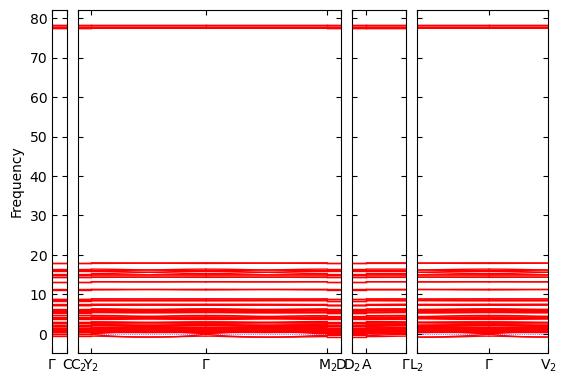

In [17]:
phonon.auto_band_structure(plot=True).show() 

In [ ]:
ph.auto_band_structure(pl